# NumPy FFT

samplingFrequency: 100 Hz
samplingInterval (1 / samplingFrequency): 0.01 s
beginTime: 0 s, endTime: 10 s
time[:2]: [0.   0.01], time[-1]: 9.99

Add even function



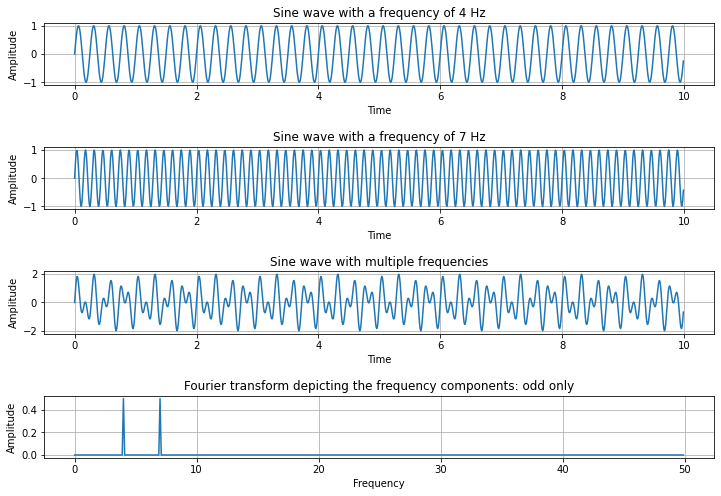

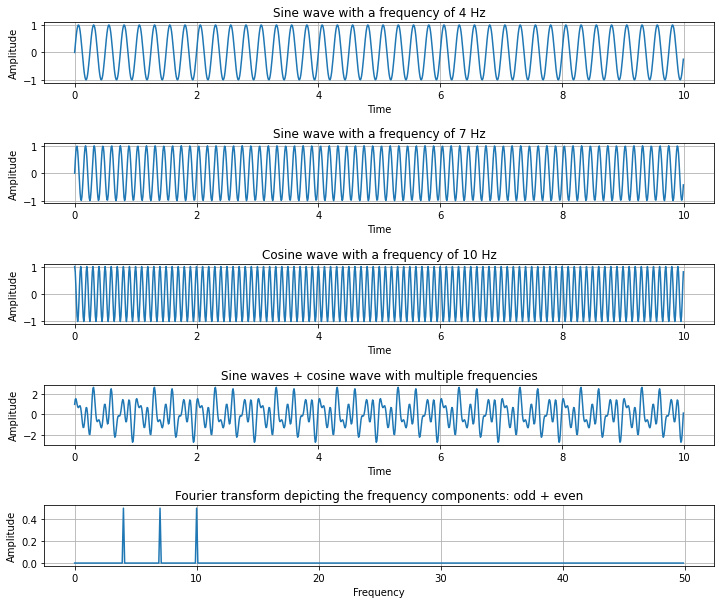

In [9]:
# Python example - Fourier transform using numpy.fft method

# https://pythontic.com/visualization/signals/fouriertransform_fft

import numpy as np
import matplotlib.pyplot as plt

# How many time points are needed i,e., Sampling Frequency
samplingFrequency = 100;  # Hz
print(f"samplingFrequency: {samplingFrequency} Hz")

# At what intervals time points are sampled
samplingInterval = 1 / samplingFrequency;
print(f"samplingInterval (1 / samplingFrequency): {samplingInterval} s")

# Begin time period of the signals
beginTime = 0
# End time period of the signals
endTime = 10 
print(f"beginTime: {beginTime} s, endTime: {endTime} s")

# Time points: sampling points for the whole time range (beginTime, endTime)
time = np.arange(beginTime, endTime, samplingInterval);

print(f"time[:2]: {time[:2]}, time[-1]: {time[-1]}")

# Frequency of the signals
f1 = 4  # Hz
f2 = 7  # Hz

#
# with f in Hz sin(2*pi * f * t) will have f cycles (periods) in 1 second
#

# Create two sine waves
amplitude1 = np.sin(2*np.pi * f1 * time)  # sin: odd function
amplitude2 = np.sin(2*np.pi * f2 * time)

# Frequency of the even (cosine) wave
f3 = 10  # Hz
amplitude3 = np.cos(2*np.pi * f3 * time)  # cos: even function

#####################################################
#
# Consider odd only waves: sum of two sin waves
#
#####################################################

# Create subplot
figure, axis = plt.subplots(4, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')
axis[0].grid()

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')
axis[1].grid()

# Add the sine waves
amplitude = amplitude1 + amplitude2

# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')
axis[2].grid()

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

#
# get array of frequencies to plot fourierTransform againt them
# Why the script is doing that?
# Actually it's just an array of integer numbers: 0, 1, 2, 3, ...
# Just to generalize the method?
#
tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
#
# NB: because our signal is antisymmetric (sin) the real part is zero (rounding errors, in fact).
# When you plot complex numbers (e.g. fourierTransform) the plot discards the imaginary part,
# therefore, the plot will just show rounding errors for the real part at level of 1e-15.
# 
# You may plot just imaginary part (it's appears to be negative).
# The script plots abs(fourierTransform) to get positive values of the frequencies.
#
axis[3].set_title('Fourier transform depicting the frequency components: odd only')
axis[3].plot(frequencies, abs(fourierTransform))  # positive values of frequencies
# axis[3].plot(frequencies, fourierTransform)  # in plot of complex numbers the imaginery part will be discarded. The real part is basically, zero.
# axis[3].plot(frequencies, fourierTransform.real)  # zero -- rounding errors about 1e-15
# axis[3].plot(frequencies, fourierTransform.imag)  # frequencies appears as negative values
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')
axis[3].grid()

#
# to test add an even function
#

#####################################################
#
# Consider mix of odd and even functions: sin + cos
#
#####################################################

print(f"\nAdd even function\n")

amplitude = amplitude1 + amplitude2 + amplitude3

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

# Create subplot
figure, axis = plt.subplots(5, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=1)

# Time domain representation for sin wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')
axis[0].grid()

# Time domain representation for sin wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')
axis[1].grid()

# Time domain representation for cosine wave
axis[2].set_title('Cosine wave with a frequency of 10 Hz')
axis[2].plot(time, amplitude3)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')
axis[2].grid()

# Time domain representation of the resultant sin + cos waves
axis[3].set_title('Sine waves + cosine wave with multiple frequencies')
axis[3].plot(time, amplitude)
axis[3].set_xlabel('Time')
axis[3].set_ylabel('Amplitude')
axis[3].grid()

# Frequency domain representation
#
# NB: because our signal is antisymmetric (sin) the real part is zero (rounding errors, in fact).
# When you plot complex numbers (e.g. fourierTransform) the plot discards the imaginary part,
# therefore, the plot will just show rounding errors for the real part at level of 1e-15.
# 
# You may plot just imaginary part (it's appears to be negative).
# The script plots abs(fourierTransform) to get positive values of the frequencies.
#
axis[4].set_title('Fourier transform depicting the frequency components: odd + even')
axis[4].plot(frequencies, abs(fourierTransform))  # positive values of frequencies
# axis[4].plot(frequencies, fourierTransform)  # in plot of complex numbers the imaginery part will be discarded. The real part is basically, zero.
# axis[4].plot(frequencies, fourierTransform.real)  # zero -- rounding errors about 1e-15
# axis[4].plot(frequencies, fourierTransform.imag)  # frequencies appears as negative values
axis[4].set_xlabel('Frequency')
axis[4].set_ylabel('Amplitude')
axis[4].grid()

# plt.show()

np.sum(signal): 25.0
N = 8, timestep = 0.1, total length = N * timestep = 0.8
signal.size: 8, fourier.real.size: 8
freq_no_timestep: [ 0.     0.125  0.25   0.375 -0.5   -0.375 -0.25  -0.125]
freq: [ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]
freq * (N * timestep): [ 0.  1.  2.  3. -4. -3. -2. -1.]

Plot Fourier spectrum against frequency



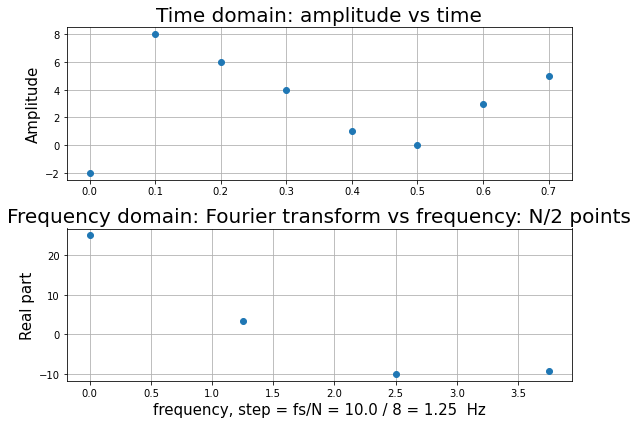

In [3]:
# Example from scipy fftfreq
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq

import numpy as np
import matplotlib.pyplot as plt

signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)

print(f"np.sum(signal): {np.sum(signal)}")

# they do not define sampling rate here, but set the number of points
N = signal.size  # window length

timestep = 0.1  # aka sample spacing d = N / sampling_rate, where sampling_rate is in Hz

print(f"N = {N}, timestep = {timestep}, total length = N * timestep = {N * timestep}")

fourier = np.fft.fft(signal)

print(f"signal.size: {signal.size}, fourier.real.size: {fourier.real.size}")

freq_no_timestep = np.fft.fftfreq(N)

freq = np.fft.fftfreq(N, timestep)

print(f"freq_no_timestep: {freq_no_timestep}")

print(f"freq: {freq}")  # NB that frequencies are not integer, because they divided by (N*timestep), that is total time length

print(f"freq * (N * timestep): {freq * (N * timestep)}")  # these are integers

print(f"\nPlot Fourier spectrum against frequency\n")

fig, ax = plt.subplots(2, 1, figsize=(9, 6))
ax[0].set_title(f"Time domain: amplitude vs time", fontsize=20)
ax[0].plot(np.arange(0, N*timestep, timestep), signal, marker="o", linestyle="None")
ax[0].set_ylabel(f"Amplitude", fontsize=15)
ax[0].grid()
ax[1].set_title(f"Frequency domain: Fourier transform vs frequency: N/2 points", fontsize=20)
ax[1].plot(freq[:N//2], fourier.real[:N//2], marker="o", linestyle="None")
ax[1].set_xlabel(f"frequency, step = fs/N = {1/timestep} / {signal.size} = {(1/timestep) / signal.size}  Hz", fontsize=15)
ax[1].set_ylabel(f"Real part", fontsize=15)
ax[1].grid()
fig.tight_layout()

In [8]:
a = np.array([10, 20, 30], dtype=float)
print(f"a.real: {a.real}")
print(f"a.imag: {a.imag}")

a.real: [10. 20. 30.]
a.imag: [0. 0. 0.]


In [9]:
for i, n in enumerate(range(0, 5, 2)):
    print(f"i: {i}, n: {n}")

i: 0, n: 0
i: 1, n: 2
i: 2, n: 4


In [11]:
z = np.ones(10)
z[::2] = -1
z

array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.])

In [13]:
t = np.arange(5)
a = np.cos(2 * np.pi * 0.1 * t[:, np.newaxis])
a

array([[ 1.        ],
       [ 0.80901699],
       [ 0.30901699],
       [-0.30901699],
       [-0.80901699]])

In [15]:
a = np.array([10, 20, 30, 40, 50])
print(f"a[:, np.newaxis]:\n{a[:, np.newaxis]}")
print(f"a[np.newaxis, :]:\n{a[np.newaxis, :]}")

a[:, np.newaxis]:
[[10]
 [20]
 [30]
 [40]
 [50]]
a[np.newaxis, :]:
[[10 20 30 40 50]]


In [22]:
t = np.array([10, 20, 30, 40, 50])
w = np.arange(1, 4)
b = w * t[:, np.newaxis]
b

array([[ 10,  20,  30],
       [ 20,  40,  60],
       [ 30,  60,  90],
       [ 40,  80, 120],
       [ 50, 100, 150]])

In [28]:
t = np.array([10, 20, 30, 40, 50])
w = np.arange(1, 4)
b = np.matmul(w, t)
b

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)

In [31]:
a = np.array([[11, 12, 13],
              [21, 22, 23]])
print(f"type(a[:, 0]): {type(a[:, 0])}, a[:, 0].shape: {a[:, 0].shape}")
print(f"a[:, 0]:\n{a[:, 0]}")
print(f"a[:, 0].T:\n{a[:, 0].T}")

b = np.array([[10],
              [20],
              [30]])
print(f"b:\n{b}")

type(a[:, 0]): <class 'numpy.ndarray'>, a[:, 0].shape: (2,)
a[:, 0]:
[11 21]
a[:, 0].T:
[11 21]
b:
[[10]
 [20]
 [30]]
